In [1]:
from torchvggish import vggish, vggish_input
from silence_tensorflow import silence_tensorflow
import numpy as np
import tensorflow as tf

2024-05-16 02:24:14.670934: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-16 02:24:14.710536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 02:24:15.009862: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 02:24:16.103416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
X = np.load('X_test.npy')
y = np.load('y_test.npy')
print("len(X):", len(X))
print("len(y):", len(y))

len(X): 269
len(y): 269


In [8]:
NUM_CLASSES = 5
y = tf.keras.utils.to_categorical(y, NUM_CLASSES)

In [9]:
model = tf.keras.models.load_model('VGGish_model.h5')

In [10]:
evaluation = model.evaluate(X, y)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

9/9 [==============================] - 0s 6ms/step - loss: 2.8210 - accuracy: 0.1004 - precision: 0.0795 - recall: 0.0446        
Test Accuracy : 10.04%


9/9 [==============================] - 0s 5ms/step


<Axes: >

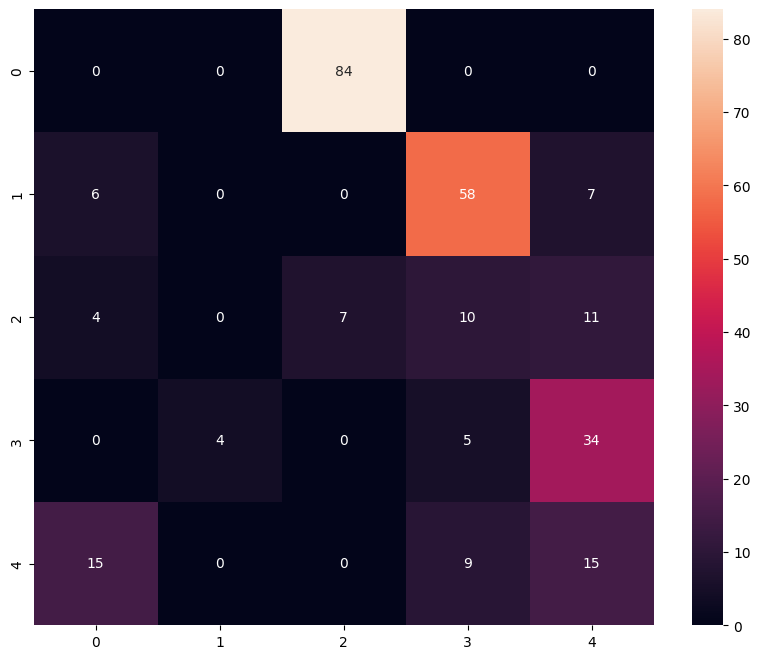

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Predict the values from the testing dataset
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00        71
           2       0.08      0.22      0.11        32
           3       0.06      0.12      0.08        43
           4       0.22      0.38      0.28        39

    accuracy                           0.10       269
   macro avg       0.07      0.14      0.10       269
weighted avg       0.05      0.10      0.07       269

